# Mirror

Call the Prob#1.PNG and draw this image to the two vertical axes (left and right -wing).

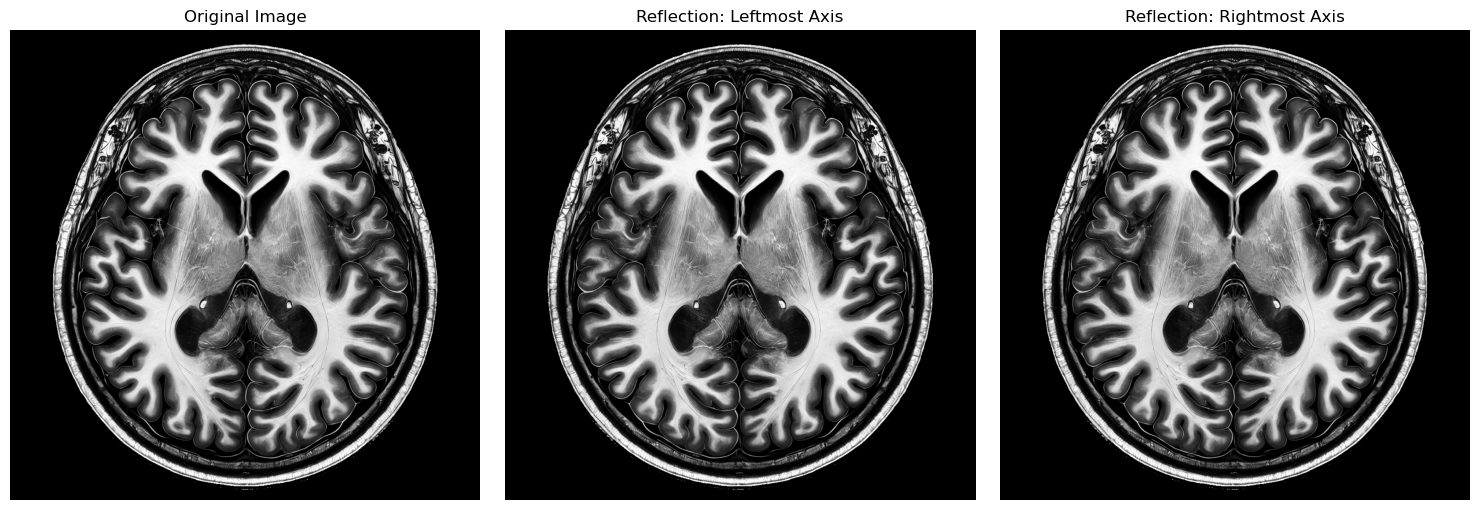

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = "Prob#1.png" 
image = Image.open(image_path)
image_array = np.array(image)

# Function to reflect the image across a vertical axis
def reflect_vertical(image_array, axis):
    height, width = image_array.shape[:2]
    reflected_image = np.zeros_like(image_array)

    if axis == "leftmost":
        for i in range(height):
            for j in range(width):
                reflected_image[i, width - 1 - j] = image_array[i, j]

    elif axis == "rightmost":
        for i in range(height):
            for j in range(width):
                reflected_image[i, j] = image_array[i, width - 1 - j]

    return reflected_image

# Reflect the image across the leftmost and rightmost axes
reflect_left = reflect_vertical(image_array, axis="leftmost")
reflect_right = reflect_vertical(image_array, axis="rightmost")

# Display the images
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap="gray")
plt.axis("off")

# Reflected across the leftmost vertical axis
plt.subplot(1, 3, 2)
plt.title("Reflection: Leftmost Axis")
plt.imshow(reflect_left, cmap="gray")
plt.axis("off")

# Reflected across the rightmost vertical axis
plt.subplot(1, 3, 3)
plt.title("Reflection: Rightmost Axis")
plt.imshow(reflect_right, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

# Rotation

Rotate the image 37° in a trigonometric direction

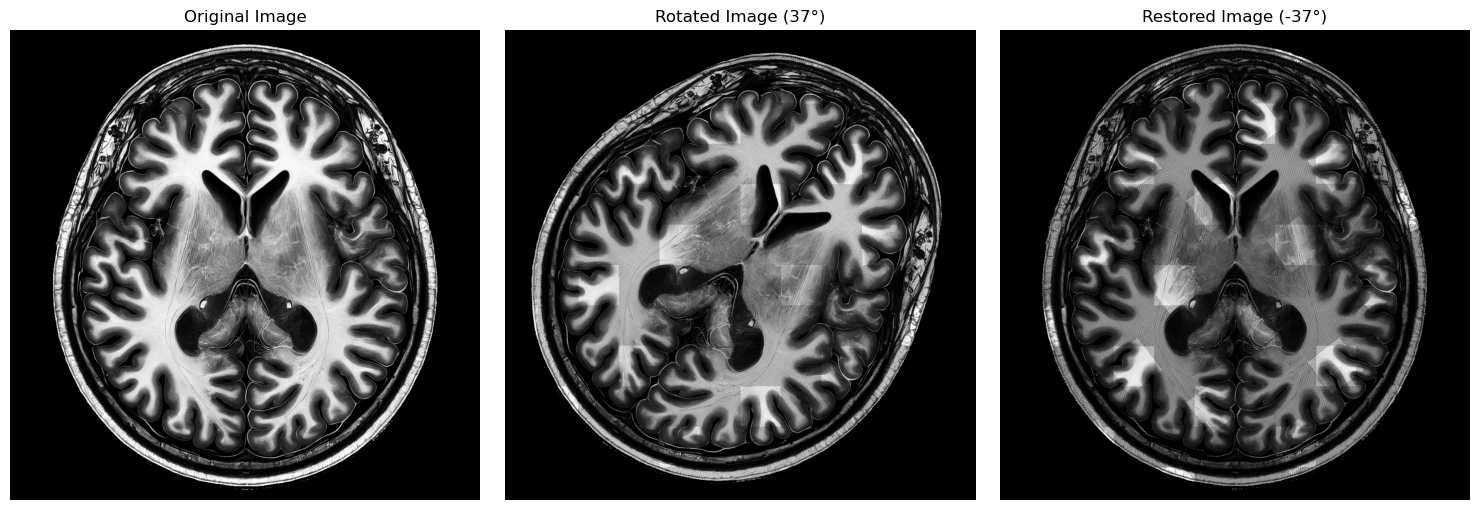

In [ ]:
# Load the image
image_path = "Prob#1.png"
image = Image.open(image_path)
image_array = np.array(image)

# Function to rotate an image manually
def rotate_image(image_array, angle):
    height, width = image_array.shape[:2]
    center = (width // 2, height // 2)
    rotated_image = np.zeros_like(image_array)

    angle_rad = np.radians(angle)
    cos_theta = np.cos(angle_rad)
    sin_theta = np.sin(angle_rad)

    for i in range(height):
        for j in range(width):
            # Calculate new coordinates
            x = int((j - center[0]) * cos_theta - (i - center[1]) * sin_theta + center[0])
            y = int((j - center[0]) * sin_theta + (i - center[1]) * cos_theta + center[1])

            # Check bounds and assign pixel values
            if 0 <= x < width and 0 <= y < height:
                rotated_image[y, x] = image_array[i, j]

    return rotated_image

# Rotate the image by 37 degrees counterclockwise
rotated_image = rotate_image(image_array, angle=37)
Image.fromarray(rotated_image).save("Prob#1_rot.png")

# Rotate the image back by -37 degrees
restored_image = rotate_image(rotated_image, angle=-37)
Image.fromarray(restored_image).save("Prob#1_antirot.png")

# Display the images
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap="gray")
plt.axis("off")

# Rotated image
plt.subplot(1, 3, 2)
plt.title("Rotated Image (37°)")
plt.imshow(rotated_image, cmap="gray")
plt.axis("off")

# Restored image
plt.subplot(1, 3, 3)
plt.title("Restored Image (-37°)")
plt.imshow(restored_image, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


Rotate the rotated image -37° in a trigonometric direction and compare with original(MSR, MAE). Explain why are'nt they zero.

In [ ]:
# Load the images
original_image_path = "Prob#1.png"  # Replace with the actual path to the original image
restored_image_path = "Prob#1_antirot.png"  # Replace with the actual path to the restored image

original_image = np.array(Image.open(original_image_path))
restored_image = np.array(Image.open(restored_image_path))

# Ensure the images have the same dimensions
if original_image.shape != restored_image.shape:
    raise ValueError("The images must have the same dimensions for comparison.")

# Calculate MSE
def calculate_mse(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    return mse

# Calculate MAE
def calculate_mae(image1, image2):
    mae = np.mean(np.abs(image1 - image2))
    return mae

# Compute the metrics
mse_value = calculate_mse(original_image, restored_image)
mae_value = calculate_mae(original_image, restored_image)

# Display the results
print(f"Mean Squared Error (MSE): {mse_value}")
print(f"Mean Absolute Error (MAE): {mae_value}")


Mean Squared Error (MSE): 45.9735107421875
Mean Absolute Error (MAE): 68.29672813415527


**Why Difference?**

- **Interpolation:**<br>
    When an image is rotated, new pixel positions are calculated based on trigonometric transformations. These calculations often involve interpolation, where pixel values are estimated to fill gaps. This process can slightly alter pixel intensities.

- **Rounding Errors:**<br>
    Pixel values are typically stored as integers. During rotation and interpolation, calculations involve floating-point numbers, which are rounded to the nearest integer. This rounding can introduce minor deviations.

- **Lossy Transformations:**<br>
    Even though the rotation is lossless in format (e.g., PNG), the mathematical operations themselves are not perfectly reversible due to the approximations inherent in interpolation and rounding.

- **Edge Effects:**<br>
    When rotating an image, edges might be cropped or altered slightly depending on how the rotation matrix handles pixels near the boundaries. These changes contribute to the discrepancies.

# Fourier transform

## Magnitude 

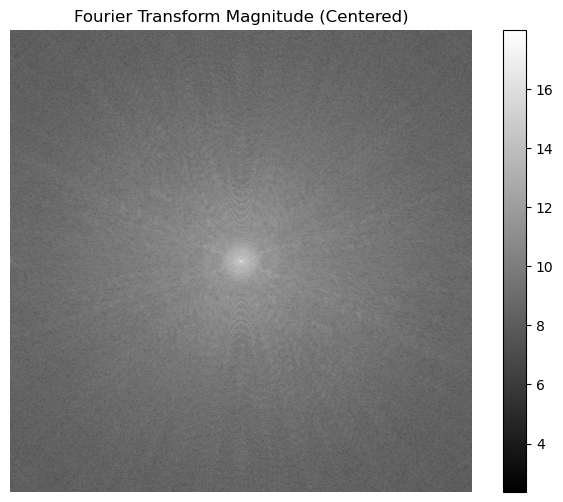

In [ ]:
# Load the image
image_path = "Prob#1.png"
image = Image.open(image_path).convert("L")
image_array = np.array(image)

# Compute the Fourier Transform
fft_result = np.fft.fft2(image_array)  # 2D Fourier Transform
fft_shifted = np.fft.fftshift(fft_result)  # Shift the zero frequency to the center
magnitude_spectrum = np.abs(fft_shifted)  # Compute the magnitude spectrum

# Display the magnitude spectrum
plt.figure(figsize=(8, 6))
plt.title("Fourier Transform Magnitude (Centered)")
plt.imshow(np.log(1 + magnitude_spectrum), cmap="gray")  # Log scale for better visualization
plt.colorbar()
plt.axis("off")
plt.show()


## Apply non-linear transformation for better visualization

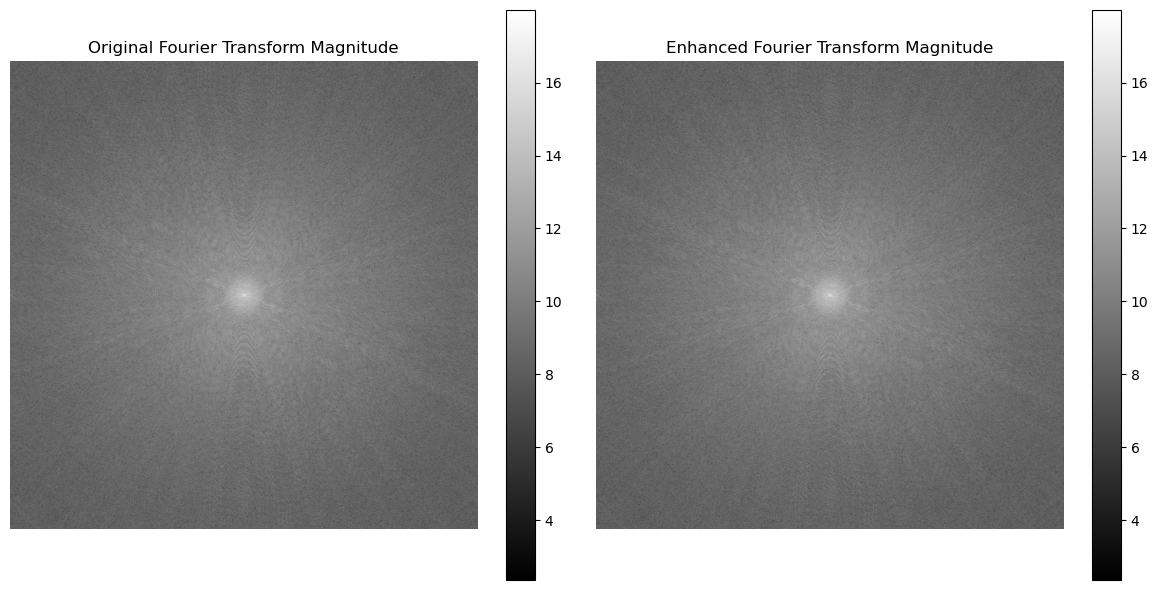

In [ ]:
# Apply non-linear transformation (logarithmic scaling)
enhanced_spectrum = np.log(1 + magnitude_spectrum)

# Plot the original and enhanced Fourier Transform magnitudes
plt.figure(figsize=(12, 6))

# Original Magnitude Spectrum
plt.subplot(1, 2, 1)
plt.title("Original Fourier Transform Magnitude")
plt.imshow(np.log(1 + magnitude_spectrum), cmap="gray")  # Default display (log scale for clarity)
plt.colorbar()
plt.axis("off")

# Enhanced Magnitude Spectrum
plt.subplot(1, 2, 2)
plt.title("Enhanced Fourier Transform Magnitude")
plt.imshow(enhanced_spectrum, cmap="gray")
plt.colorbar()
plt.axis("off")

plt.tight_layout()
plt.show()

## Replace magnitude/phase randomly uniform 

Replace the magnitude of the Fourier transform with the random variable uniform (0,1) and by calculating the inverse Fourier transform, display the resulting image (pay attention to the need for hermit symmetry in the frequency domain) 

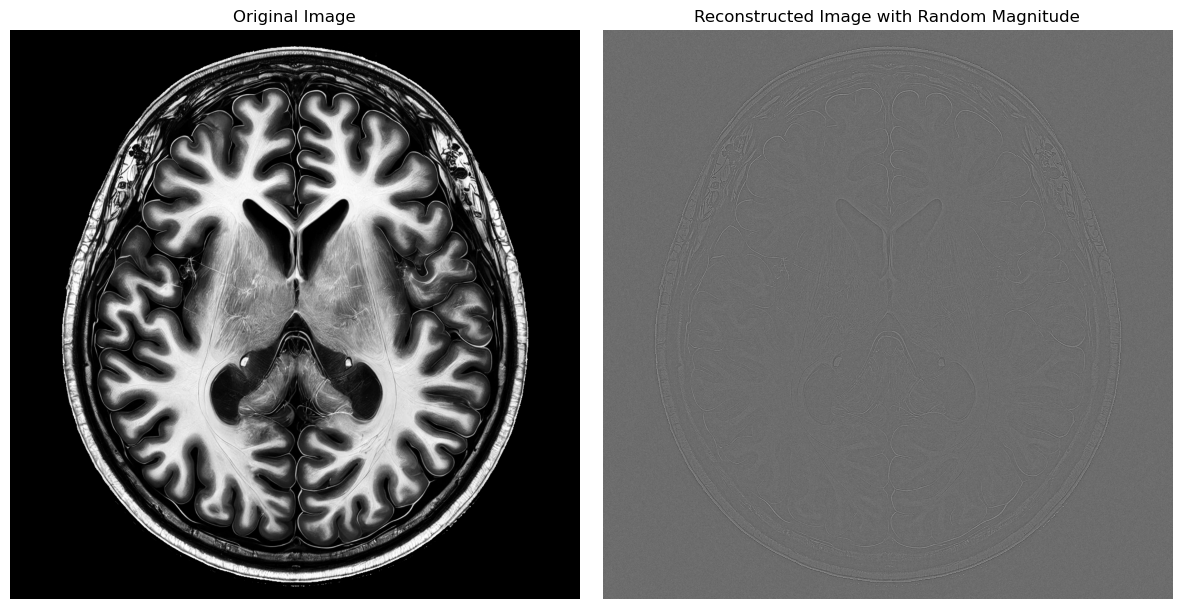

In [ ]:
# Replace the magnitude with random values (0,1)
random_magnitude = np.random.uniform(0, 1, fft_shifted.shape)
phase = np.angle(fft_shifted)  # Extract the phase
modified_fft = random_magnitude * np.exp(1j * phase)  # Combine random magnitude with original phase

# Ensure Hermitian symmetry
modified_fft = np.fft.ifftshift(modified_fft)  # Shift back to original frequency arrangement

# Compute the inverse Fourier Transform
inverse_fft = np.fft.ifft2(modified_fft).real  # Take the real part to get the image

plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap="gray")
plt.axis("off")

# Reconstructed Image with Random Phase
plt.subplot(1, 2, 2)
plt.title("Reconstructed Image with Random Magnitude")
plt.imshow(inverse_fft, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


now perform the same operation on the phase and display the resulting image (pay attention to the need for hermit symmetry in the frequency domain)

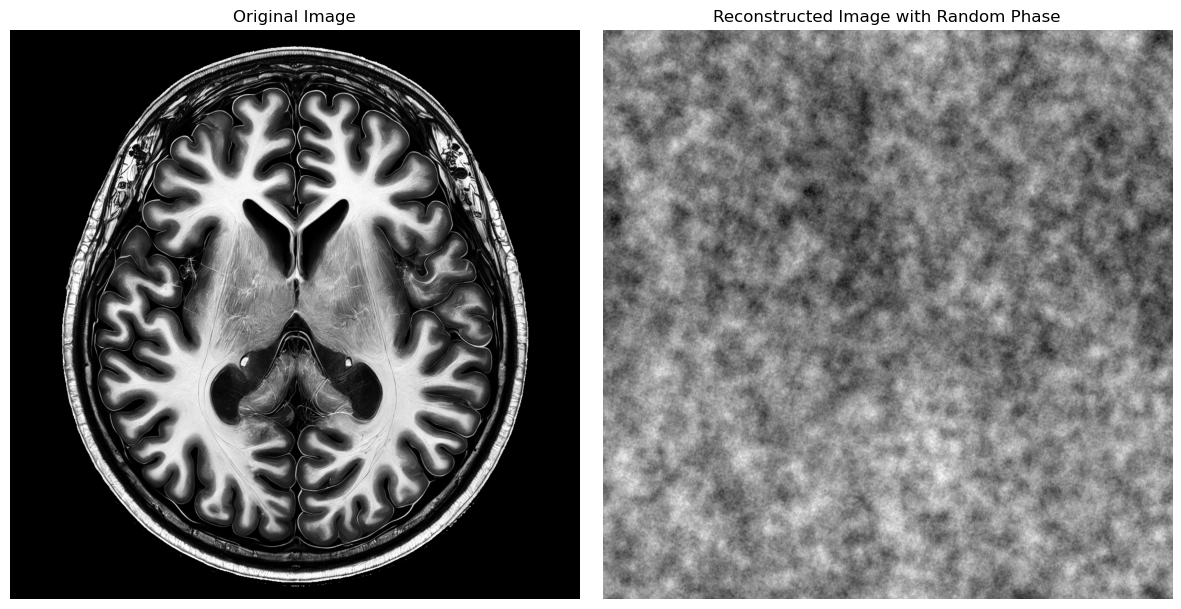

In [ ]:
# Replace the phase with random values
magnitude = np.abs(fft_shifted)  # Extract the magnitude
random_phase = np.random.uniform(0, 2 * np.pi, fft_shifted.shape)  # Random phase in radians
modified_fft = magnitude * np.exp(1j * random_phase)  # Combine magnitude with random phase

# Ensure Hermitian symmetry
modified_fft = np.fft.ifftshift(modified_fft)  # Shift back to original frequency arrangement

# Compute the inverse Fourier Transform
inverse_fft = np.fft.ifft2(modified_fft).real  # Take the real part to get the image

# Display the original and reconstructed images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap="gray")
plt.axis("off")

# Reconstructed Image with Random Phase
plt.subplot(1, 2, 2)
plt.title("Reconstructed Image with Random Phase")
plt.imshow(inverse_fft, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


## Filtering

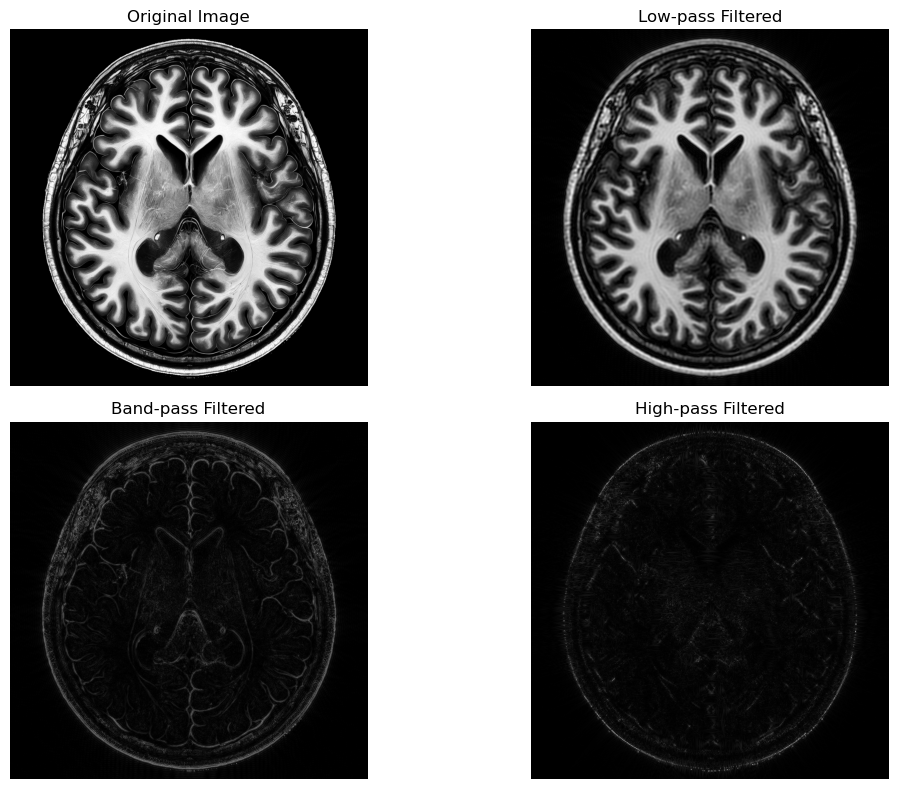

In [ ]:
import cv2

# Load the image (ensure it's grayscale)
image = cv2.imread('Prob#1.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Image not found. Ensure the file path is correct.")

# Compute the 2D Fourier Transform
fft_image = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft_image)

# Create filters
rows, cols = image.shape
center_row, center_col = rows // 2, cols // 2

# Low-pass filter
d1 = np.zeros((rows, cols), dtype=np.float32)
cv2.circle(d1, (center_col, center_row), 100, 1, -1)

# Band-pass filter
d2 = np.zeros((rows, cols), dtype=np.float32)
cv2.circle(d2, (center_col, center_row), 500, 1, -1)
cv2.circle(d2, (center_col, center_row), 100, 0, -1)

# High-pass filter
d3 = np.ones((rows, cols), dtype=np.float32)
cv2.circle(d3, (center_col, center_row), 500, 0, -1)

# Apply filters
filtered_images = []
for d in [d1, d2, d3]:
    filtered_fft = fft_shifted * d
    inverse_fft = np.fft.ifft2(np.fft.ifftshift(filtered_fft))
    filtered_image = np.abs(inverse_fft)
    filtered_images.append(filtered_image)

# Display results
titles = ['Original Image', 'Low-pass Filtered', 'Band-pass Filtered', 'High-pass Filtered']
images = [image] + filtered_images

plt.figure(figsize=(12, 8))
for i, img in enumerate(images):
    plt.subplot(2, 2, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


| Filter | Frequency Zone | Effect            
|---------------|--------------------|--------------------------
| Original Image| All                | Full detail              
| Low-pass      | Low                | Smooth, blurry           
| Band-pass     | Mid                | Moderate detail enhancement
| High-pass     | High               | Sharp, edge-focused      


# Interpolation

Call the Prob#1.PNG image by removing even columns and rows, to 512 × 512. 
After each row and each column of this new image, put a row and a column equal to zero (your image dimensions are now 512 × 512) and display this image.

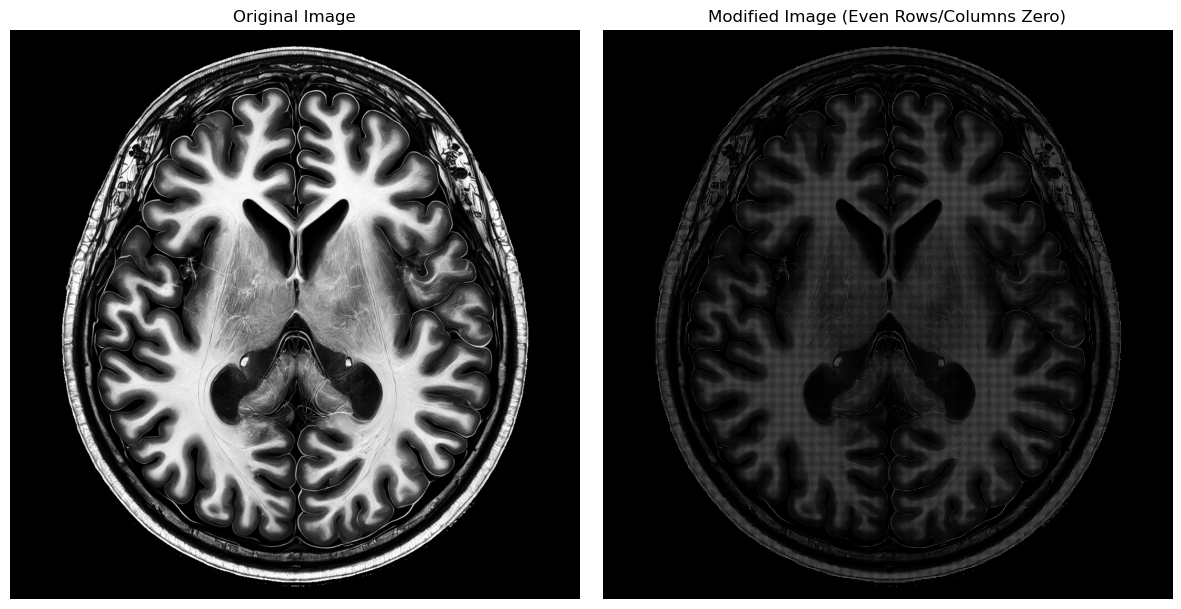

In [ ]:
# Load the original image and convert it to grayscale
original_image = Image.open("Prob#1.png").convert("L")
original_pixels = np.array(original_image)
height, width = original_pixels.shape

# Create a matrix with zeros replacing even rows and columns
modified_matrix = original_pixels.copy()
for row in range(height):
    for col in range(width):
        if row % 2 == 0 or col % 2 == 0:  # Replace even rows and columns with zero
            modified_matrix[row, col] = 0

# Plot both images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Modified image
plt.subplot(1, 2, 2)
plt.imshow(modified_matrix, cmap="gray")
plt.title("Modified Image (Even Rows/Columns Zero)")
plt.axis("off")

# Show the plots
plt.tight_layout()
plt.show()

Now, using a suitable interpolation algorithm, fill in the zero rows and columns with appropriate values and call this image Prob#1_int.png, display the main image (Prob#1.png) next to the new image, and present your analysis by calculating the PSNR between these two images (the goal is to use the appropriate interpolation algorithm that can create the maximum PSNR).

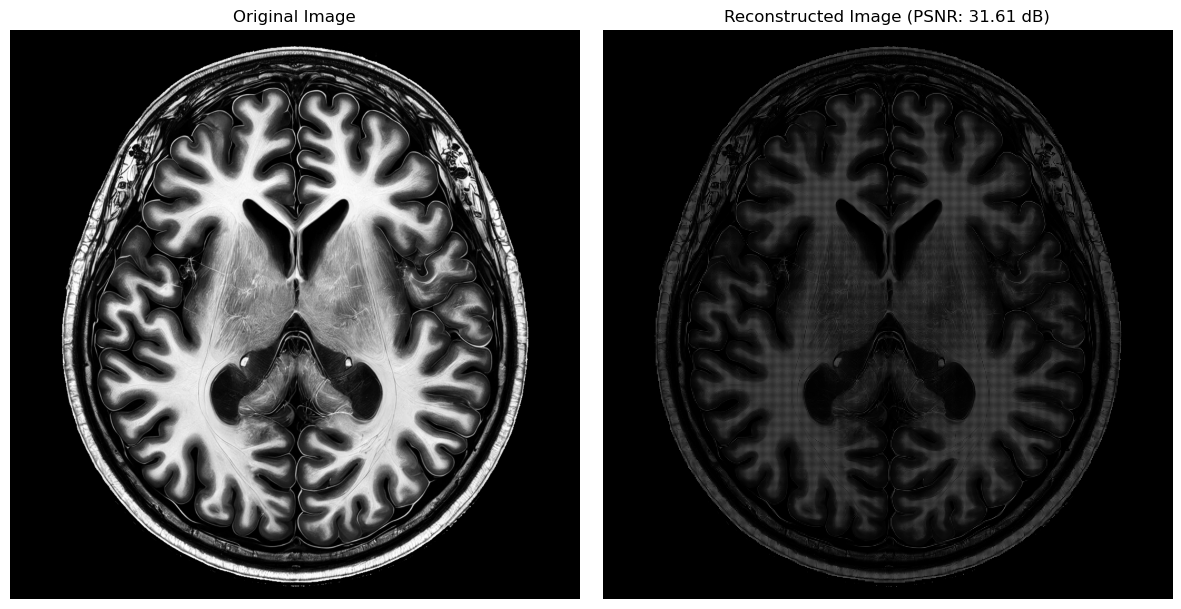

PSNR between original and reconstructed image: 31.61 dB


In [ ]:
# Bicubic interpolation algorithm
def bicubic_interpolation(matrix, x, y):
    def cubic(t):
        t = abs(t)
        if t <= 1:
            return 1 - (2 * t**2) + (t**3)
        elif 1 < t < 2:
            return 4 - (8 * t) + (5 * t**2) - (t**3)
        return 0

    interpolated_value = 0
    for i in range(-2, 3):
        for j in range(-2, 3):
            x_idx = min(max(x + i, 0), height - 1)  # Clamp indices
            y_idx = min(max(y + j, 0), width - 1)
            weight = cubic(i) * cubic(j)
            interpolated_value += weight * matrix[x_idx, y_idx]
    return interpolated_value

# Fill the zero cells with interpolated values
reconstructed_matrix = modified_matrix.copy()
for row in range(height):
    for col in range(width):
        if modified_matrix[row, col] == 0:
            reconstructed_matrix[row, col] = bicubic_interpolation(modified_matrix, row, col)

# Calculate PSNR
def calculate_psnr(original, reconstructed):
    mse = np.mean((original - reconstructed)**2)
    if mse == 0:  # Perfect reconstruction
        return float("inf")
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel**2) / mse)
    return psnr

psnr = calculate_psnr(original_pixels, reconstructed_matrix)

# Plot the original and reconstructed images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_pixels, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_matrix, cmap="gray")
plt.title(f"Reconstructed Image (PSNR: {psnr:.2f} dB)")
plt.axis("off")
reconstructed_image = Image.fromarray(reconstructed_matrix.astype('uint8'))
reconstructed_image.save("Prob#1_int.png")
plt.tight_layout()
plt.show()

print(f"PSNR between original and reconstructed image: {psnr:.2f} dB")


**Why bicubic interpolation?**

To maximize the PSNR between the original image and the reconstructed image, an advanced interpolation algorithm like bicubic interpolation can be used. Bicubic interpolation considers the values of neighboring pixels, making smoother and more accurate approximations compared to simpler methods like bilinear interpolation.

**Inferred from the plot**
    
- Overall structure preserved well.

- Slight blurring and grid artifacts visible.

- Fine textures (like thin gray-white matter boundaries) are softened.

- Some "blockiness" may be due to the limited interpolation neighborhood (5×5 patch).

**31.61 dB means**:

- We achieved a decent reconstruction.

- Minor perceptual quality loss is visible, but structural fidelity is maintained — which is very acceptable given the level of downsampling.